<a href="https://colab.research.google.com/github/protocol-streams/querent-experimental/blob/main/Code_Llama_7B_Instruct.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

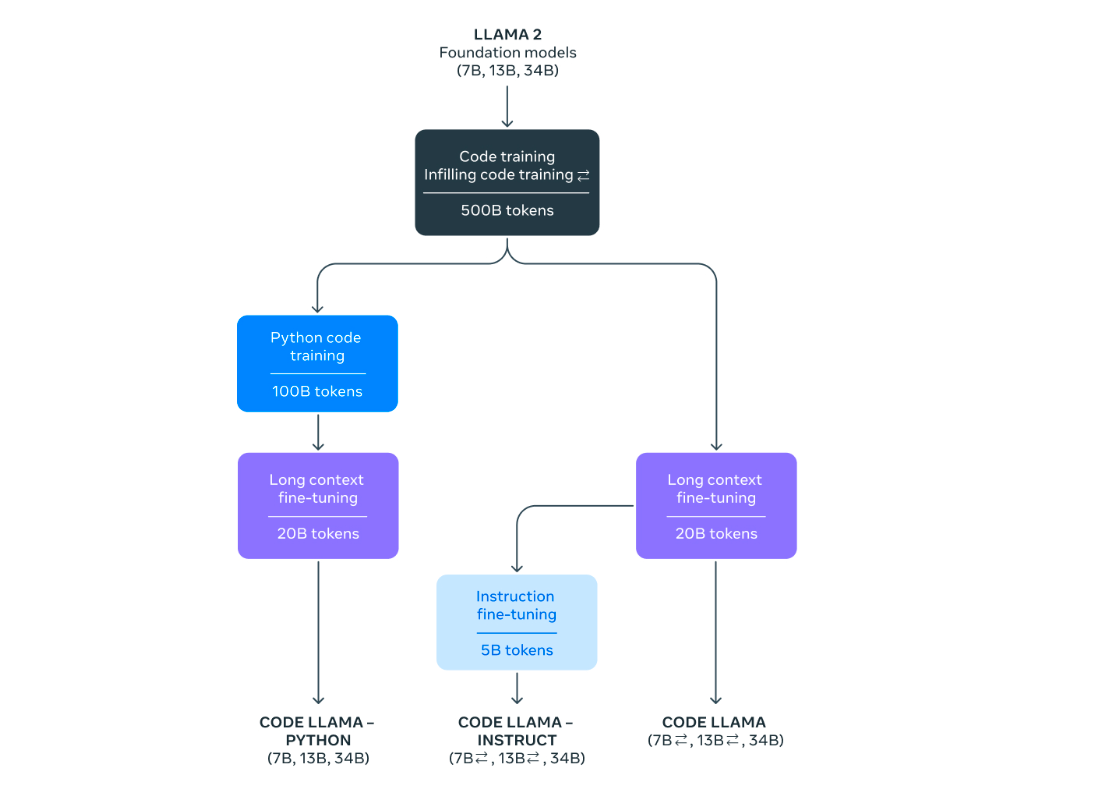

In [ ]:
!pip install git+https://github.com/huggingface/transformers.git@refs/pull/25740/head accelerate


In [2]:
from transformers import AutoTokenizer
import transformers
import torch


In [3]:

model = "codellama/CodeLlama-7b-Instruct-hf" #"codellama/CodeLlama-7b-hf"



In [4]:
tokenizer = AutoTokenizer.from_pretrained(model)
pipeline = transformers.pipeline(
    "text-generation",
    model=model,
    torch_dtype=torch.float16,
    device_map="auto",
)

Loading checkpoint shards:   0%|          | 0/2 [00:00<?, ?it/s]

In [5]:
system = "Provide answers in Python"
user = "Write a function that detects a pattern that matches the style of 08-Sep-2023 from the given text"

prompt = f"<s><<SYS>>\n{system}\n<</SYS>>\n\n{user}"


In [6]:
sequences = pipeline(
    prompt,
    do_sample=True,
    top_k=10,
    temperature=0.1,
    top_p=0.95,
    num_return_sequences=1,
    eos_token_id=tokenizer.eos_token_id,
    max_length=200,
    add_special_tokens=False
)

Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


In [7]:
for seq in sequences:
    print(f"Result: {seq['generated_text']}")

Result: <s><<SYS>>
Provide answers in Python
<</SYS>>

Write a function that detects a pattern that matches the style of 08-Sep-2023 from the given text.

<details>
  <summary>Answer</summary>

```python
import re

def detect_pattern(text):
    pattern = r"[0-9]{2}-[A-Z][a-z]{2}-[0-9]{4}"
    return re.findall(pattern, text)
```

</details>

<details>
  <summary>Example</summary>

```python
text = "01-Jan-2023, 02-Feb-2023, 03-Mar-2023, 04-Apr-2023, 05-
